# Exploring Causation and Correlation

Author: Yamini Manral (manral.y@northeastern.edu)

Causal inference is a fundamental concept in many scientific fields, including statistics, medicine, economics, and social sciences. It focuses on determining **the causal impact of one variable on another**, going beyond mere correlation to establish a directional relationship. In other words, it seeks to answer the question: **does X cause Y?**

It is the process of determining whether a relationship between variables is cause-and-effect. It's an intellectual discipline that considers assumptions, study designs, and estimation strategies to draw causal conclusions from data<sup>1</sup>. It involves determining whether changes in one variable are responsible for the observed changes in another variable. Causal inference is crucial in various disciplines, including statistics, epidemiology, economics, political science, and machine learning.

## Causation and Correlation :

**Causation :**
Causation between random variables A and B implies that A and B have a cause-and-effect relationship with one another. Or we can say existence of one gives birth to other, and we say A causes B or vice versa. Causation is also termed as causality.

**Correlation :**
It is a statistical term which depicts the degree of association between two random variables. In data analysis it is often used to determine the amount to which they relate to one another.
1. Positive correlation – If with increase in random variable A, random variable B increases too, or vice versa.
2. Negative correlation –
If increase in random variable A leads to a decrease in B, or vice versa.
3. No correlation –
When both the variables are completely unrelated and change in one leads to no change in other. in other.

1. **Correlation vs. Causation:**
   - **Correlation:** Correlation refers to a statistical association between two variables. A correlation does not imply causation; it only indicates that changes in one variable are associated with changes in another. Spurious correlations, where variables appear correlated but are not causally related, highlight the importance of distinguishing between correlation and causation.
   - **Causation:** Causation implies a direct cause-and-effect relationship between variables. Establishing causation requires more rigorous analysis, as correlations can arise due to confounding factors or coincidence.

2. **Importance of Causality:**
   - Understanding causality is crucial in various fields, including public health, economics, social sciences, and policy-making.
   - Causal knowledge helps make informed decisions, design effective interventions, and predict the consequences of actions.
   - Without a grasp of causality, one may misinterpret data, leading to flawed conclusions and ineffective strategies.

3. **Causal Diagrams (Directed Acyclic Graphs - DAGs):**
   - Causal diagrams, often represented as DAGs, visually depict the causal relationships between variables.
   - DAGs help researchers articulate their assumptions about causal connections and guide the selection of variables to include in analyses.
   - They provide a transparent way to communicate complex causal structures and identify potential confounders.

In summary, causal inference involves a range of methods and concepts, from basic distinctions between correlation and causation to advanced techniques like DAGs, counterfactuals, and Bayesian approaches. Each sub-topic plays a crucial role in advancing our understanding of causal relationships in diverse fields.

### Spurious Correlation<sup>1 

A spurious correlation is a statistical relationship between two variables that appears to be causal but is not. This misleading relationship can arise due to two main factors:

**Coincidence:** Sometimes, two variables might appear to be correlated simply by chance. This is especially true when dealing with large datasets, where random fluctuations can create the illusion of a relationship.

**The presence of a lurking variable:** This is a third, unobserved variable that actually influences both of the variables you are measuring. The lurking variable creates the illusion of a causal relationship between the two observed variables, even though they are not directly related.

Below are some examples of spurious correlations as seen in real life. **But one should never mistake coincidence with correlation.**

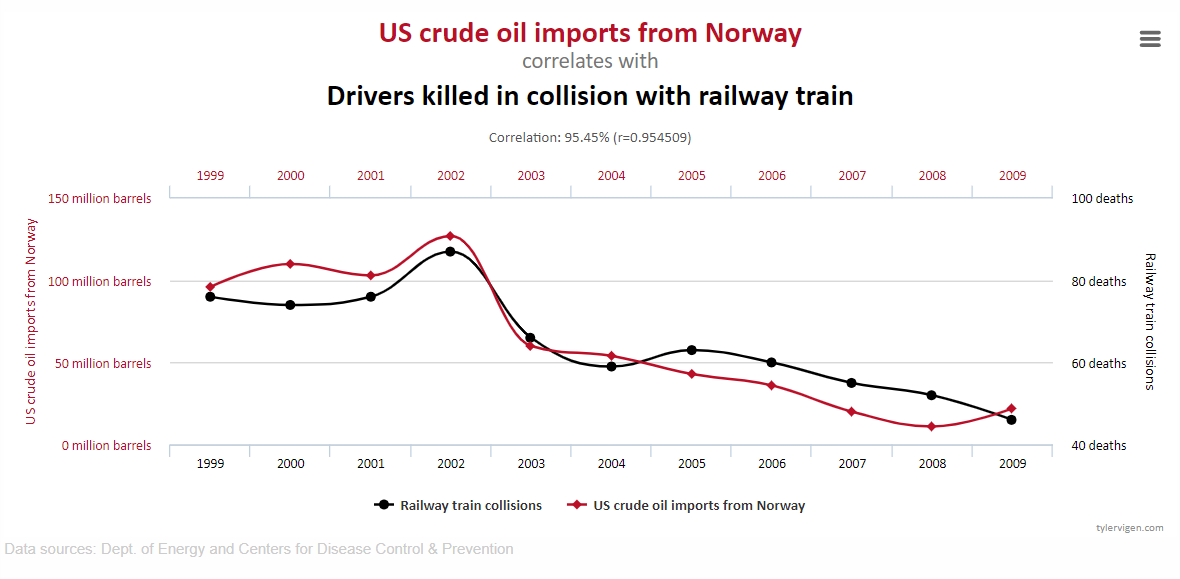

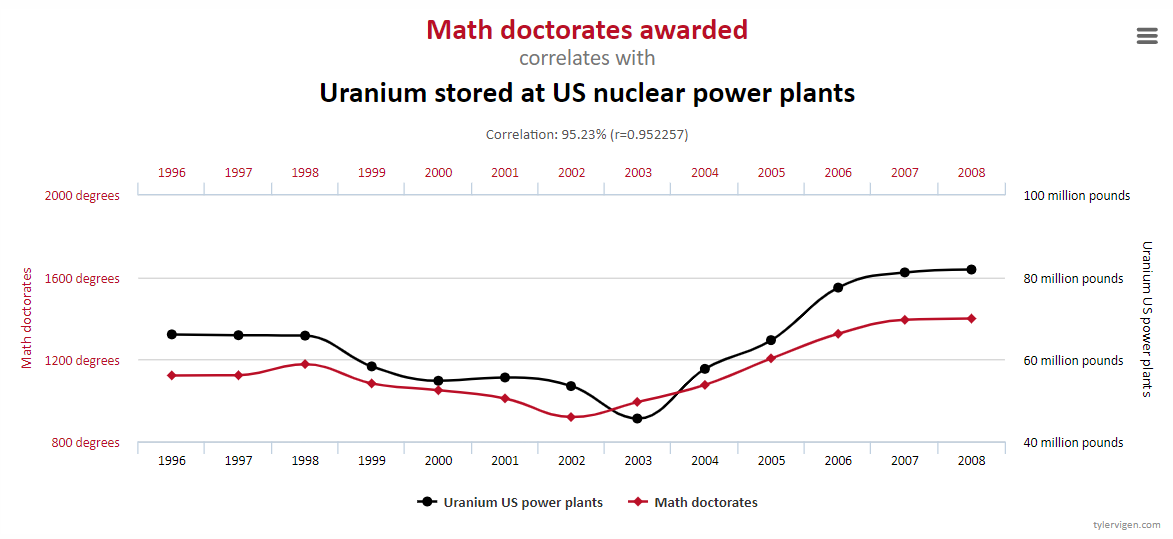

## What are DAGs?

A DAG stands for Directed Acyclic Graph. It's a way of representing relationships between different variables or tasks in a clear and organized manner.

**Directed:** This means that the edges in a DAG have arrows, indicating the direction of the relationship. For example, an arrow pointing from A to B indicates that A has an influence on B, but not vice versa.

**Acyclic:** This means that there are no cycles in the graph. In simpler terms, you can't follow the arrows around the graph and end up back where you started. This ensures that the relationships are well-defined and there are no circular dependencies.

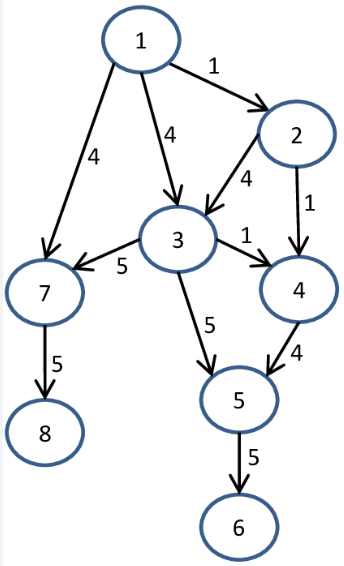

Overall, DAGs are a powerful tool for visualizing and managing complex relationships. They are widely used in various fields for their clarity, efficiency, and ease of understanding. I will use DAGs to show possible causal relationships between variables.

## Correlation between offender's sex, their relation to the victim, and circumstances of shooting
### How much does the offender's sex affect his choice of victim and circumstances of the gun violence??

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset<sup>2

In [7]:
df_original = pd.read_csv("INFO_7390_Art_and_Science_of_Data\\CSV\\US_gun_deaths_1985-2018.csv", encoding = "ISO-8859-1")
# df_original.head()
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389730 entries, 0 to 389729
Data columns (total 21 columns):
 #   Column                                     Non-Null Count   Dtype 
---  ------                                     --------------   ----- 
 0   Unnamed: 0                                 389730 non-null  int64 
 1   year                                       389730 non-null  int64 
 2   month                                      389730 non-null  int64 
 3   region                                     389730 non-null  object
 4   state                                      389730 non-null  object
 5   victim_age                                 385320 non-null  object
 6   victim_sex                                 389730 non-null  object
 7   victim_race                                389730 non-null  object
 8   victim_race_plus_hispanic                  389730 non-null  object
 9   victim_ethnicity                           389730 non-null  object
 10  weapon_used         

In [8]:
df = df_original[['year','offender_sex', 'weapon_used' ,'region', 'state', 'victim_sex', 'victim_race', 'offenders_relationship_to_victim' ,'offenders_relationship_to_victim_grouping', 'circumstance' , 'circumstance_grouping' ]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389730 entries, 0 to 389729
Data columns (total 11 columns):
 #   Column                                     Non-Null Count   Dtype 
---  ------                                     --------------   ----- 
 0   year                                       389730 non-null  int64 
 1   offender_sex                               389730 non-null  object
 2   weapon_used                                389730 non-null  object
 3   region                                     389730 non-null  object
 4   state                                      389730 non-null  object
 5   victim_sex                                 389730 non-null  object
 6   victim_race                                389730 non-null  object
 7   offenders_relationship_to_victim           389730 non-null  object
 8   offenders_relationship_to_victim_grouping  389730 non-null  object
 9   circumstance                               389730 non-null  object
 10  circumstance_groupin

### EDA

Let us look at some important columns of this dataset and find unique values in each column.

In [9]:
print(df['victim_sex'].unique())
print(df['offender_sex'].unique())
print(df['victim_race'].unique())

['Male' 'Female' 'Unknown']
['Male' 'Female' 'Unknown']
['White (includes Mexican-Americans)' 'Black'
 'American Indian or Alaskan Native' 'Asian or Pacific Islander' 'Unknown']


In [10]:
df['victim_race'].unique()

array(['White (includes Mexican-Americans)', 'Black',
       'American Indian or Alaskan Native', 'Asian or Pacific Islander',
       'Unknown'], dtype=object)

In [11]:
print(df['offenders_relationship_to_victim'].unique())
print(df['offenders_relationship_to_victim_grouping'].unique())

['stranger' 'acquaintance' 'wife' 'unknown' 'boyfriend' 'brother'
 'neighbor' 'friend' 'girlfriend' 'mother' 'husband'
 'homosexual relationship' 'ex-husband' 'in-law' 'common-law husband'
 'other family' 'stepmother' 'father' 'son' 'ex-wife' 'stepfather'
 'other - known to victim' 'employee' 'stepdaughter' 'daughter' 'sister'
 'employer' 'common-law wife' 'stepson']
['Offender Not Known to Victim' 'Outside Family But Known to Victim'
 'Within Family' 'Unknown Relationship']


In [12]:
df['offender_sex'].unique()

array(['Male', 'Female', 'Unknown'], dtype=object)

In [13]:
print(df['circumstance'].unique())
print(df['circumstance_grouping'].unique())
print(df['weapon_used'].unique())

['Felon Killed by Police' 'Brawl Due to Influence of Alcohol'
 'Other (Other Than Felony Type)' 'Narcotic Drug Laws' 'Burglary'
 'All instances where the facts provided do not permit determination of circumstances'
 'Other Arguments'
 'Other Negligent Handling of Gun Which Results in Death of Another'
 'Sniper Attack' 'Robbery' 'Argument Over Money or Property'
 'Felon Killed by Private Citizen' "Lover's Triangle"
 'Brawl Due to Influence of Narcotics' 'All suspected Felony Type'
 'Other - not specified (Felony Type)' 'Children Playing With Gun'
 'Gangland Killings'
 'All Other Manslaughter by Negligence Except Traffic Deaths' 'Gambling'
 'Rape' 'Motor Vehicle Theft' 'Victim Shot in Hunting Accident'
 'Juvenile Gang Killings' 'Prostitution and Commercialized Vice'
 'Other Sex Offenses' 'Larceny'
 'Gun-Cleaning Death - Other Than Self-Inflicted' 'Arson'
 'Child Killed by Babysitter' 'Institutional Killings' 'Abortion']
['Justifiable Homicide' 'Other Than Felony Type' 'Felony Type'
 'Una

In [14]:
df.head()

,year,offender_sex,weapon_used,region,state,victim_sex,victim_race,offenders_relationship_to_victim,offenders_relationship_to_victim_grouping,circumstance,circumstance_grouping
0,1985,Male,handgun,Southeast,AL,Male,White (includes Mexican-Americans),stranger,Offender Not Known to Victim,Felon Killed by Police,Justifiable Homicide
1,1985,Male,handgun,Southeast,AL,Male,White (includes Mexican-Americans),acquaintance,Outside Family But Known to Victim,Brawl Due to Influence of Alcohol,Other Than Felony Type
2,1985,Male,rifle,Southeast,AL,Female,White (includes Mexican-Americans),wife,Within Family,Other (Other Than Felony Type),Other Than Felony Type
3,1985,Male,handgun,Southeast,AL,Male,White (includes Mexican-Americans),acquaintance,Outside Family But Known to Victim,Other (Other Than Felony Type),Other Than Felony Type
4,1985,Male,firearm,Southeast,AL,Male,White (includes Mexican-Americans),acquaintance,Outside Family But Known to Victim,Narcotic Drug Laws,Felony Type


## Encoding categorical columns

In [15]:
import category_encoders as ce

# Create an instance of the OrdinalEncoder
oe = ce.ordinal.OrdinalEncoder(
    cols=df.select_dtypes(include="object")
)

# # Fit and transform the filtered DataFrame, encoding categorical variables
df_en = oe.fit_transform(df)
df_en

,year,offender_sex,weapon_used,region,state,victim_sex,victim_race,offenders_relationship_to_victim,offenders_relationship_to_victim_grouping,circumstance,circumstance_grouping
0,1985,1,1,1,1,1,1,1,1,1,1
1,1985,1,1,1,1,1,1,2,2,2,2
2,1985,1,2,1,1,2,1,3,3,3,2
3,1985,1,1,1,1,1,1,2,2,3,2
4,1985,1,3,1,1,1,1,2,2,4,3
...,...,...,...,...,...,...,...,...,...,...,...
389725,2018,1,1,5,21,2,1,3,3,6,4
389726,2018,1,4,1,3,1,1,22,2,3,2
389727,2018,3,3,3,37,1,2,4,4,10,3
389728,2018,1,1,5,33,1,3,14,3,6,4


In [16]:
# Create an instance of the OrdinalEncoder
oe = ce.ordinal.OrdinalEncoder(
    cols=df.select_dtypes(include="object")
)

# Fit and transform the filtered DataFrame, encoding categorical variables
df_en = oe.fit_transform(df)
df_en

,year,offender_sex,weapon_used,region,state,victim_sex,victim_race,offenders_relationship_to_victim,offenders_relationship_to_victim_grouping,circumstance,circumstance_grouping
0,1985,1,1,1,1,1,1,1,1,1,1
1,1985,1,1,1,1,1,1,2,2,2,2
2,1985,1,2,1,1,2,1,3,3,3,2
3,1985,1,1,1,1,1,1,2,2,3,2
4,1985,1,3,1,1,1,1,2,2,4,3
...,...,...,...,...,...,...,...,...,...,...,...
389725,2018,1,1,5,21,2,1,3,3,6,4
389726,2018,1,4,1,3,1,1,22,2,3,2
389727,2018,3,3,3,37,1,2,4,4,10,3
389728,2018,1,1,5,33,1,3,14,3,6,4


## Correlation Matrix

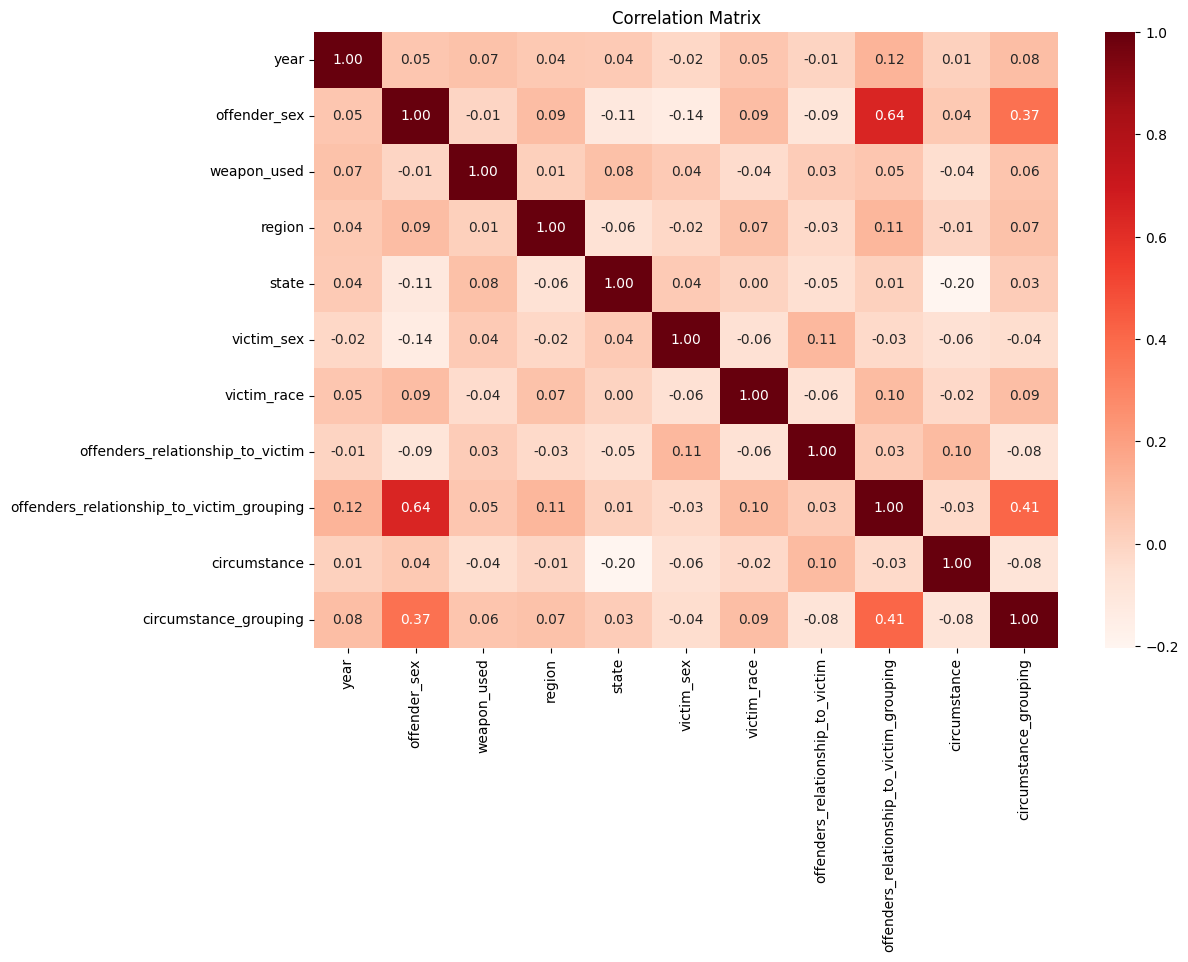

In [17]:
# Calculate the correlation matrix
correlation_matrix = df_en.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Insights from the correlation matrix


* There is some correlation between offender's sex and the circumstances in which crime happened.
* There is high correlation between offender's sex and their relationship to the victim,and low correlation between victim's sex and offender's relation to them.

## Causal Inference by LiNGAM

### What is LiNGAM?
The Linear Non-Gaussian Acyclic Model (LiNGAM) is a statistical model used in the field of causal inference to estimate the underlying causal structure of a system from observational data. It falls under the broader category of Structural Equation Models (SEMs) and is designed to identify causal relationships among variables in a linear system where the variables are not necessarily Gaussian distributed.

Here are the key components and concepts associated with LiNGAM:

1. **Linearity:**
   - LiNGAM assumes that the relationships between variables are linear. This means that the influence of one variable on another is represented by a linear equation.

2. **Non-Gaussianity:**
   - LiNGAM relies on the non-Gaussianity of the observed variables. Traditional methods like linear regression often assume Gaussian (normal) distribution, but LiNGAM works well when dealing with variables that are not normally distributed.

3. **Acyclic Structure:**
   - The term "Acyclic" implies that the causal relationships among variables do not form cycles. This acyclic structure is crucial for identifying a clear direction of causality.

4. **Identification of Causal Direction:**
   - LiNGAM aims to estimate the causal direction between variables. It helps identify which variable in a system is causing changes in another variable, based on statistical properties observed in the data.

5. **Independent Components:**
   - LiNGAM assumes that the components (variables) are statistically independent. This independence assumption is essential for separating the effects of different variables and inferring causality.

6. **Applications:**
   - LiNGAM has been applied in various fields, including economics, neuroscience, and systems biology. In neuroscience, for example, it has been used to infer the direction of information flow in brain networks.

The key idea behind LiNGAM is to exploit the statistical properties of non-Gaussianity to identify the direction of causality. Various algorithms and methods have been developed for estimating LiNGAM structures from observational data, and these methods often involve techniques such as independent component analysis (ICA) or other statistical approaches.

In [18]:
# Importing
from IPython.display import Image
import category_encoders as ce

import graphviz
import lingam
from lingam.utils import make_dot, make_prior_knowledge

In [19]:
#  Data Preprocessing
oe = ce.ordinal.OrdinalEncoder(
    cols=df.select_dtypes(include="object")
    )

df_en = oe.fit_transform(df)

In [20]:
df_list = df.columns.to_list()
df_dict = {}

for i, column in zip(range(len(df_list)), df_list):
    df_dict[column] = i

print(len(df_list))
print(df_dict)

11
{'year': 0, 'offender_sex': 1, 'weapon_used': 2, 'region': 3, 'state': 4, 'victim_sex': 5, 'victim_race': 6, 'offenders_relationship_to_victim': 7, 'offenders_relationship_to_victim_grouping': 8, 'circumstance': 9, 'circumstance_grouping': 10}


The prior knowlegde is our understanding of strong correlationships between columns "offenders_relationship_to_victim_grouping", "offender_sex" and "circumstance_grouping"

In [21]:
#  Setting prior knowledge
prior_knowledge = make_prior_knowledge(
    11,
    paths = [
             [df_dict["offenders_relationship_to_victim_grouping"], df_dict["offender_sex"],df_dict['circumstance_grouping']
             ]],
                           
)

In [22]:
# lingam modeling

model = lingam.DirectLiNGAM(
                    random_state=42,
                    measure = 'pwling',
                    prior_knowledge = prior_knowledge
                    )

model.fit(df_en)

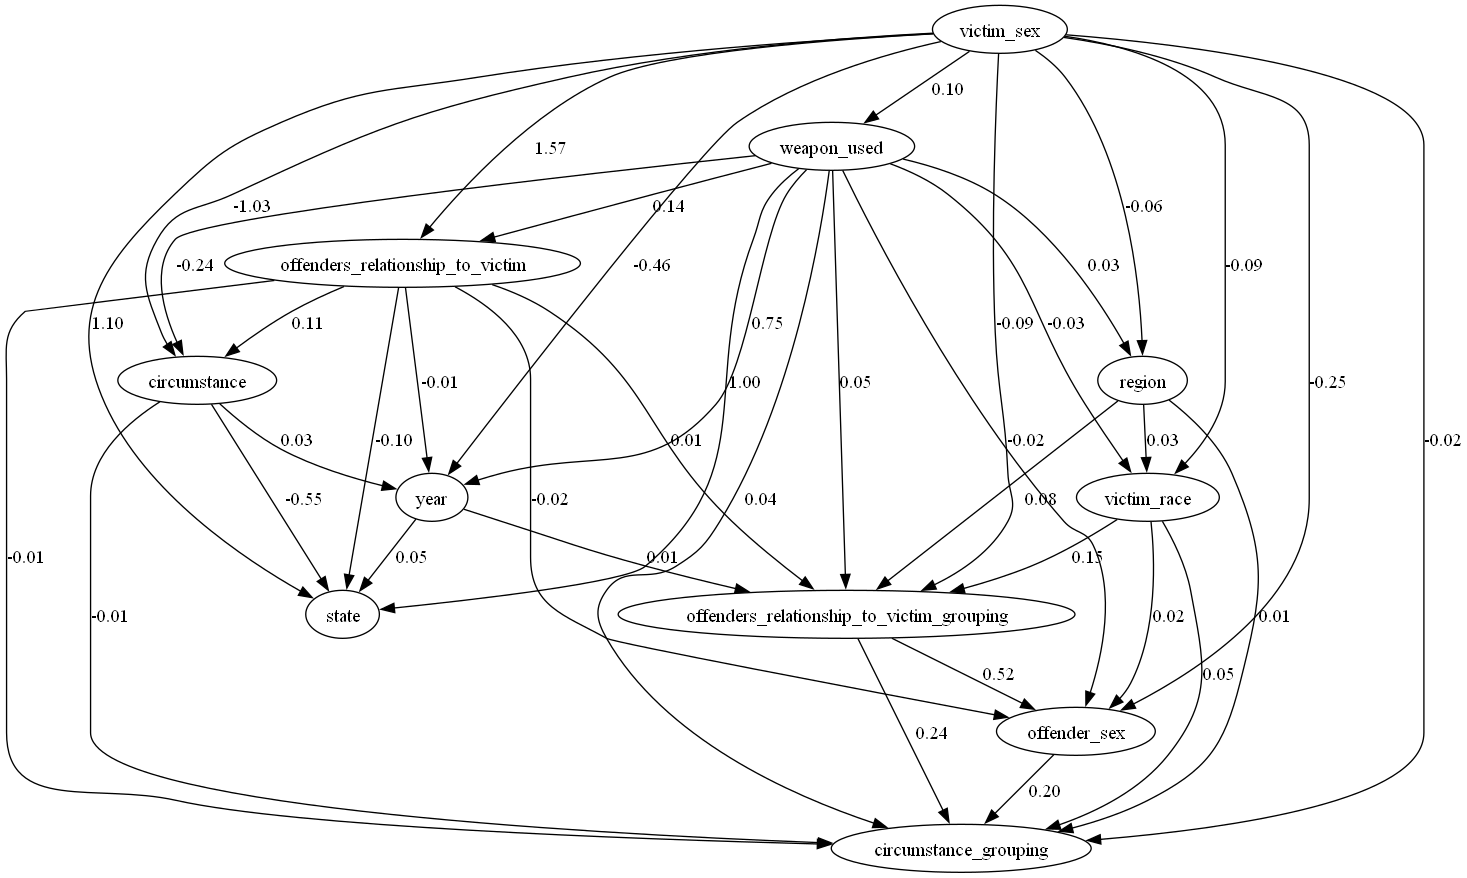

In [23]:
dot = make_dot(
    model.adjacency_matrix_,
     labels=df_en.columns.to_list(),
    )

dot.format = 'png'
dot.render('dag')

Image("dag.png")

This graph shows how the variables affect each other based on the model's findings.

## Interpretation of the DAG

* offender's sex has a causal effect on offender's relation to the victim
* circumstances of the violence has a causal effect on the relationship between offender and victim.
* circumstances of violence has causal effect on offender's sex.

The code below extends the previous analysis by leveraging the **fitted linear regression model** to predict "offender_sex" and incorporate that information into the visualized causal graph. This provides a more comprehensive understanding of the relationships between the variables and how they might influence each other, leading to better prediction of offender sex based on the other features.

In [24]:
# LiNGAM with Linear Regression (Target Variable : "writing score")
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True)
reg.fit(df_en.drop(["offender_sex"], axis=1), df_en["offender_sex"])

LinearRegression()

This part creates a list called features containing the indices of all columns in the DataFrame df_en except the "offender_sex" column.

features:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


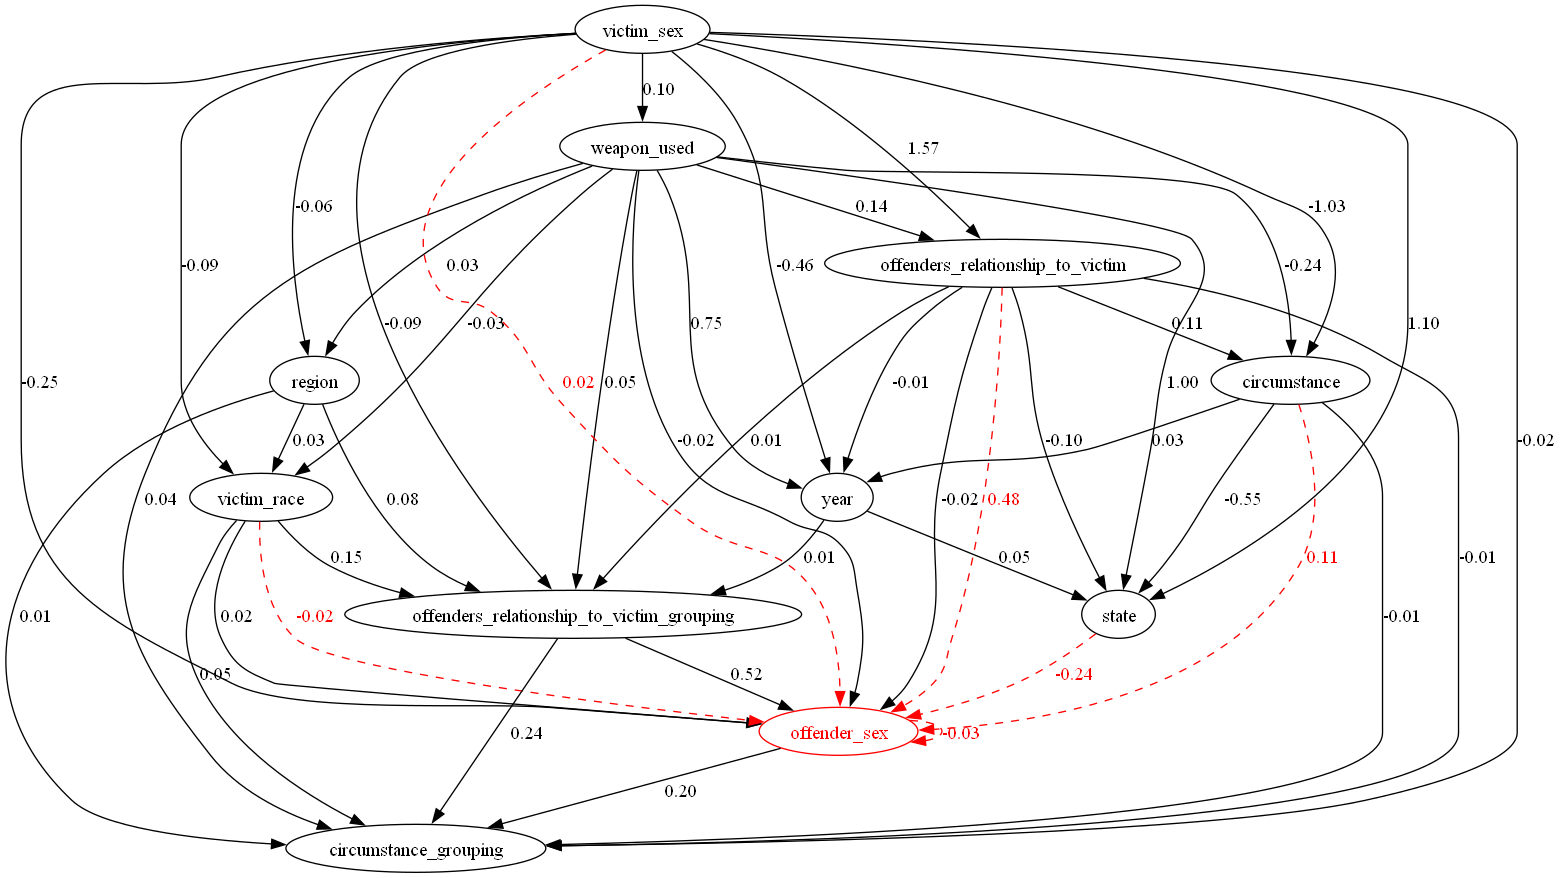

In [25]:
features = [i for i in range(df_en.drop(["offender_sex"], axis=1).shape[1])]
print("features: ", features)

dot = make_dot(
    model.adjacency_matrix_,
    labels=df_en.columns.to_list(),
    prediction_feature_indices=features, 
    prediction_target_label='offender_sex',
    prediction_coefs=reg.coef_
    )

dot.format = 'png'
dot.render('dag')

Image("dag.png")

## Insight

* the edge from "offender sex" to "circumstance_grouping" has a value of 0.20, indicating that there is a small but positive relationship between these two variables.
* the edge from "offenders_relationship_to_victim_grouping" to "circumstance_grouping" has a value of 0.24, indicating that there is a small but positive relationship between these two variables.
* the edge from "offenders_relationship_to_victim_grouping" to "cOffender_sex" has a value of 0.52, indicating that there is a strong positive relationship between these two variables.

### My interpretation

Offender's sex is a important factor in the choice of victim and the way they choose to perform the killings.

## References

1. [Spurious correlations](https://www.tylervigen.com/spurious-correlations)
2. [U.S. GUN KILLINGS](https://guns.periscopic.com/)
3. [Causal Inference](https://www.sciencedirect.com/topics/social-sciences/causal-inference#:~:text=Causal%20inference%20refers%20to%20an,causal%20conclusions%20based%20on%20data.)

## MIT License



Copyright (c) 2023 Yamini Manral

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
